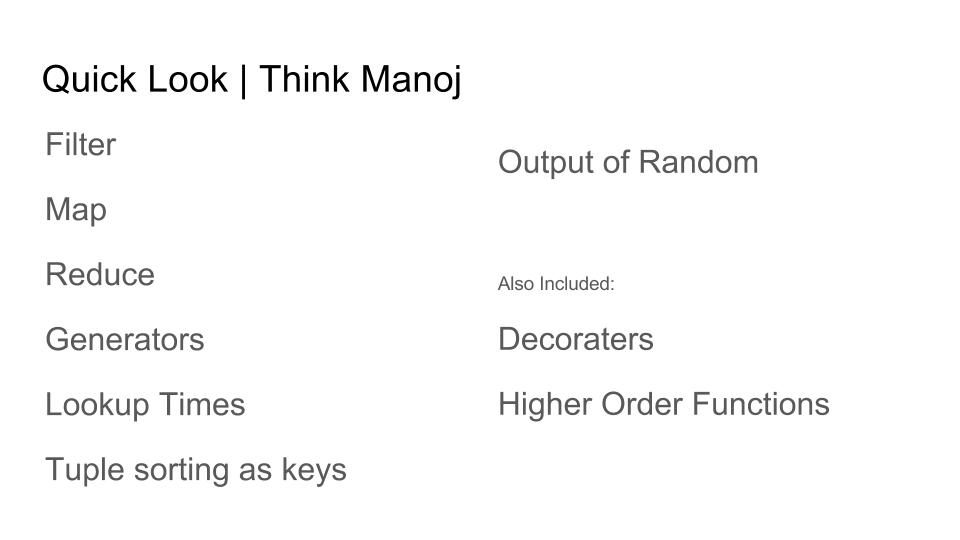

In [1]:
from IPython.display import Image
Image(filename = "UT3.jpg")

# List Comprehension

In [2]:
names = ["Vipul", "Uday", "Shriram", "Paneer", "Masood"]
[s for s in names if s.startswith("S")]

['Shriram']

# Annonomous Functions

In [3]:
names = ["Vipul", "Uday", "Shriram", "Paneer", "Masood"]
list(filter(lambda x: x.startswith("S"), names))

['Shriram']

In [4]:
def some_function(x):
    return x.startswith("S")

names = ["Vipul", "Uday", "Shriram", "Paneer", "Masood"]
list(filter(some_function, names))

['Shriram']

# Decorated Functions

In [5]:
def fun(name):
    print(name)

fun("Entrayn")

Entrayn


In [6]:
# add_welcome returns wrapper_function
# wrapper function adds value before and after the function call

def add_welcome(fun):
    def wrapper_function(name):
        print("Welcome", end=" ")
        fun(name)
    return wrapper_function

def fun(name):
    print(name)

add_welcome(fun)("Entrayn")

Welcome Entrayn


In [7]:
def add_welcome(fun):
    def wrapper_function(name):
        print("Welcome", end=" ")
        fun(name)
    return wrapper_function

@add_welcome
def fun(name):
    print(name)

@add_welcome
def fun2(name):
    print(name * 2)

fun2("Entrayn")

Welcome EntraynEntrayn


In [8]:
def add_welcome(fun):
    def wrapper_function(*args, **kwargs):
        print("Welcome", end=" ")
        fun(*args, **kwargs)
    return wrapper_function

@add_welcome
def fun(name, age):
    print(name, age)

fun("Entrayn", 5)

Welcome Entrayn 5


# Stacked Data

In [9]:
data = [
  {'name': 'chris', 'component': 'bonus', 'salary': 500},
  {'name': 'chris', 'component': 'base', 'salary': 10000},
  {'name': 'adam', 'component': 'bonus', 'salary': 50},
  {'name': 'adam', 'component': 'base', 'salary': 30000},
]

from functools import reduce
def reducer(accumulator, row):
    
    name, component, sal =  row["name"], row["component"], row["salary"]
    
    accumulator[name] = accumulator[name] if name in accumulator else {}
    accumulator[name][component] = accumulator[name].get(component, 0) + sal
    return accumulator

output = reduce(reducer, data, {})

import json
print(json.dumps(output, indent=4))

{
    "adam": {
        "base": 30000,
        "bonus": 50
    },
    "chris": {
        "base": 10000,
        "bonus": 500
    }
}


# Generators

In [10]:
def fun(x):
    i=0
    while(i<x):
        yield i
        i+=1

[i for i in fun(10)]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [11]:
def fun(x):
    i=0
    while(i<x):
        print("yield")
        yield i
        i+=1
        print("yielded")

for i in fun(10):
    print(i)

yield
0
yielded
yield
1
yielded
yield
2
yielded
yield
3
yielded
yield
4
yielded
yield
5
yielded
yield
6
yielded
yield
7
yielded
yield
8
yielded
yield
9
yielded


In [12]:
[i for i in range(10)]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# Map

In [13]:
list(map(str, range(10)))

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [14]:
l = [str(i) for i in range(10)]
[int(i)+1 for i in l]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [15]:
l = [str(i) for i in range(10)]
print(l)
list(map(lambda x: int(x)+1, l))

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Counting

In [16]:
words = ["desk", "monitor", "table", "desk", "window", "window"]
from collections import Counter
Counter(words)

Counter({'desk': 2, 'monitor': 1, 'table': 1, 'window': 2})

In [17]:
words = ["desk", "monitor", "table", "desk", "window", "window"]
counter = {}
for word in words:
    counter[word] = counter.get(word, 0) + 1
counter

{'desk': 2, 'monitor': 1, 'table': 1, 'window': 2}

# Sorting

In [18]:
counter

{'desk': 2, 'monitor': 1, 'table': 1, 'window': 2}

In [19]:
list(counter)

['monitor', 'window', 'table', 'desk']

In [20]:
counter.keys()

dict_keys(['monitor', 'window', 'table', 'desk'])

In [21]:
sorted(counter.values(), reverse=True)

[2, 2, 1, 1]

In [22]:
sorted(counter, reverse=True, key=lambda x: counter[x])

['window', 'desk', 'monitor', 'table']

In [23]:
counter.values()

dict_values([1, 2, 1, 2])

In [24]:
counter.items()

dict_items([('monitor', 1), ('window', 2), ('table', 1), ('desk', 2)])

In [25]:
sorted(counter.items(), key=lambda x: x[1])

[('monitor', 1), ('table', 1), ('window', 2), ('desk', 2)]

# Sorting using parameter key

In [26]:
sorted(counter.items(), key=lambda x: x[1], reverse=True)

[('window', 2), ('desk', 2), ('monitor', 1), ('table', 1)]

In [27]:
secondary_sorted_items = sorted(counter.items(), key=lambda x: x[0])
print(secondary_sorted_items)
sorted(secondary_sorted_items, key=lambda x: x[1], reverse=True)

[('desk', 2), ('monitor', 1), ('table', 1), ('window', 2)]


[('desk', 2), ('window', 2), ('monitor', 1), ('table', 1)]

# Duplicates

In [28]:
l = [1,2,3,4,5]
len(set(l)) == len(l)

True

In [29]:
l = [1,2,3,4,5,5]
len(set(l)) == len(l)

False

In [30]:
l = [1,4,3,2,5, 2]
l.sort()

e = enumerate(l)
idx, prev = next(e)

is_duplicate = False
for idx, num in e:
    if num == prev:
        is_duplicate = True
        break
    prev = num
if is_duplicate:
    print("YES")
else:
    print("NO")

YES


# Sorting Tuples

In [31]:
(0,2)<(0,2)

False

In [32]:
(2,2,3)<(2,2)

False

# Unhashable type: 'list'

In [33]:
try:
    a={[1,2]:"a"}
except TypeError as e:
    print(e)

unhashable type: 'list'


# Grouping Anagrams with Tuples as Dictionary Keys and list values

In [34]:
words = ["deltas", "desalt", "lasted", "salted", "slated", "staled",
         "retainers", "ternaries", "generating", "greatening",
         "resmelts", "smelters", "termless"]

from functools import reduce
def fun(accumulator, word):

    # Convert word to key by sorting
    key = tuple(sorted(list(word)))

    if key in accumulator:
        accumulator[key].append(word)
    else:
        accumulator[key] = [word]

    return accumulator

groups = reduce(fun, words, {}).values()
sorted([(len(group), group)for group in groups], reverse=True)

[(6, ['deltas', 'desalt', 'lasted', 'salted', 'slated', 'staled']),
 (3, ['resmelts', 'smelters', 'termless']),
 (2, ['retainers', 'ternaries']),
 (2, ['generating', 'greatening'])]

In [35]:
tuple(sorted(list("deltas")))

('a', 'd', 'e', 'l', 's', 't')

# Lookup Time For List Index, Value and Dictionary Keys

In [36]:
import datetime
def print_execution_time(fun):
    def wrapper(*args, **kwargs):
        print()
        print(fun.__name__)
        start = datetime.datetime.now()
        fun(*args, **kwargs)
        stop = datetime.datetime.now()
        execution_time = stop - start
        print(execution_time)
    return wrapper

@print_execution_time
def find_element_in_list_with_index(l):
    print(l[9999], l[0], l[5000])

l = list(range(10000))
find_element_in_list_with_index(l)

@print_execution_time
def find_element_in_list(l):
    print(l.index(9999), l.index(0), l.index(5000))

l = list(range(10000))
find_element_in_list(l)

@print_execution_time
def find_element_in_dict(d):
    print(9999 in d and 0 in d and 500 in d)

d = {k:None for k in range(10000)}
find_element_in_dict(d)

@print_execution_time
def find_element_in_list_with_index_10000_times(l):
    for item in l:
        pass

l = list(range(10000))
find_element_in_list_with_index_10000_times(l)

@print_execution_time
def find_element_in_list_10000_times(l):
    for i in range(10000):
        l.index(i)

l = list(range(10000))
find_element_in_list_10000_times(l)

@print_execution_time
def find_element_in_dict_10000_times(d):
    for i in range(10000):
        i in d

d = {k:None for k in range(10000)}
find_element_in_dict_10000_times(d)


find_element_in_list_with_index
9999 0 5000
0:00:00.000779

find_element_in_list
9999 0 5000
0:00:00.000649

find_element_in_dict
True
0:00:00.000047

find_element_in_list_with_index_10000_times
0:00:00.000124

find_element_in_list_10000_times
0:00:00.674472

find_element_in_dict_10000_times
0:00:00.000529


# Random word generation using freequency

In [37]:
f = open("emma.txt")
import string
from functools import reduce
words = []
for line in f:
    words_in_line = map(
        lambda x: x.strip(string.punctuation).lower(),
        line.split())
    words.extend(words_in_line)


h = {}
for word in words:
    h[word] = h.get(word, 0) + 1

i=1
h2 = {}
while(i<len(words)):
    b = " ".join(words[i-1:i+10])
    h2[b] = h2.get(b, 0) + 1
    i+=1


d = [(v, k) for k, v in h2.items()]
s = sorted(d, reverse=True)

e = []
for count, word_pair in s:
    e.extend([word_pair] * count)

import random
for i in range(500):
    index = random.randint(0, len(e))
    print(e[index], end=" ")

have harriet in his thoughts at the moment who could say mrs elton they were all taking the scheme as a particular a quick despatch of the roast mutton and rice pudding they did the very last thing before i returned to dress i another it is pork a roast loin of pork as to very good sort--which was our great comfort but the measles are painful a conclusion of their present acquaintance and yet she could then having nothing else to do formed a sort of half-circle this answer however was admitted the impossibility of her quitting her remembrance of box hill seemed to exist there is no saying bates four weeks yesterday.--a miss hawkins!--well i had always rather fancied sold at a reasonable price and where girls might be sent of the impending evil without the slightest perception of any thing as ourselves--but it was quite a secret known to nobody else and looking at her of what nature oh the best nature improving her little friend's mind by a great deal of useful shew her kindness--and wi